In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/customer/customercon_dataset2_6.xlsx')
data.head()

,year,industry,st,dateoflisting,age,staff,entrpreneur,foreign,al,roa,...,east,west,topfivesalesamount,customerconcentration,supplychainconcentration,aitechnology,blockchaintechnology,cloudcomputingtech,bigdatatechnology,digitaltechapplication
0,2012,10,0,33267,21,31019,0,0,78.3163,6.4676,...,1,0,1.900515e+09,1.85,0.93,0.0,0.0,0.0,0.0,0.0
1,2013,10,0,33267,22,35330,0,0,77.9970,5.8383,...,1,0,2.823094e+09,2.09,1.05,0.0,0.0,0.0,0.0,2.0
2,2014,10,0,33267,23,40647,0,0,77.2046,5.2390,...,1,0,1.210000e+09,0.83,1.92,0.0,0.0,0.0,0.0,12.0
3,2015,10,0,33267,24,42300,0,0,77.7015,6.1106,...,1,0,2.697000e+09,2.98,1.99,0.0,0.0,0.0,0.0,2.0
4,2016,10,0,33267,25,58280,0,0,80.5367,5.5590,...,1,0,2.140000e+09,0.90,1.49,0.0,0.0,1.0,0.0,1.0


In [3]:
X = data.drop(['customerconcentration'], axis=1)
y = data['customerconcentration']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


       year  industry  st  dateoflisting  age  staff  entrpreneur  foreign  \
0      2012        10   0          33267   21  31019            0        0   
1      2013        10   0          33267   22  35330            0        0   
2      2014        10   0          33267   23  40647            0        0   
3      2015        10   0          33267   24  42300            0        0   
4      2016        10   0          33267   25  58280            0        0   
...     ...       ...  ..            ...  ...    ...          ...      ...   
26796  2020         2   0          44666   -2    248            1        0   
26797  2018         2   0          44721   -4    386            0        1   
26798  2019         2   0          44721   -3    413            0        1   
26799  2020         2   0          44721   -2    473            0        1   
26800  2021         2   0          44721   -1    537            0        1   

            al      roa  ...        labpro  east  west  topfive

In [4]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Selected Features: Index(['year', 'industry', 'st', 'dateoflisting', 'age', 'staff',
       'entrpreneur', 'foreign', 'al', 'roa', 'asset', 'currency', 'revgrow',
       'revenue', 'pgdp', 'finance', 'freight', 'internet', 'lasset',
       'cashassetrate', 'labpro', 'east', 'west', 'topfivesalesamount',
       'supplychainconcentration', 'aitechnology', 'blockchaintechnology',
       'cloudcomputingtech', 'bigdatatechnology', 'digitaltechapplication'],
      dtype='object')
Mean Squared Error with Selected Features: 67.5218192500305


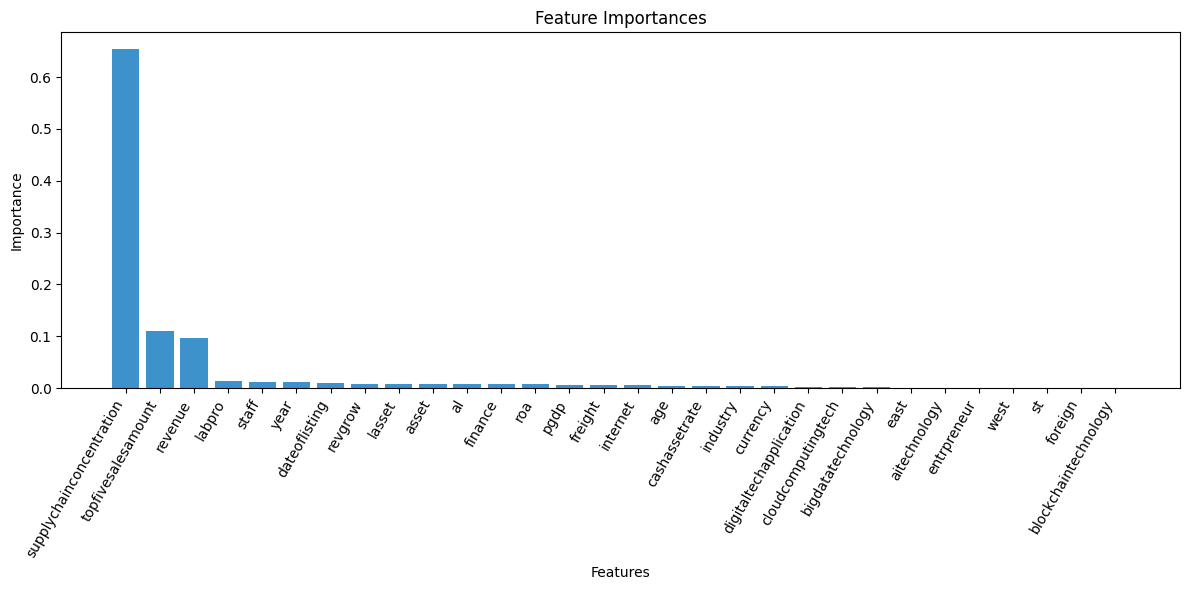

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import random

# A simple Ant Colony Optimization implementation for feature selection

# Define the parameters for ACO
num_ants = 1
num_features = X_train.shape[1]
num_iterations = 5
evaporation_rate = 0.5
alpha = 1
beta = 2

# Initialize pheromone levels
pheromones = np.ones(num_features)

# Define the heuristic information (can be uniform)
heuristic = np.ones(num_features)

# Define the probability of selecting each feature
def calculate_probabilities(pheromones, heuristic, alpha, beta):
    return (pheromones ** alpha) * (heuristic ** beta)

# Define the fitness function to evaluate a subset of features
def evaluate_feature_subset(features, X_train, y_train, X_val, y_val):
    X_train_subset = X_train[:, features]
    X_val_subset = X_val[:, features]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_subset, y_train)

    y_pred = model.predict(X_val_subset)
    mse = mean_squared_error(y_val, y_pred)

    return -mse

# Main ACO loop
best_solution = None
best_score = float('-inf')

for iteration in range(num_iterations):
    all_solutions = []
    all_scores = []

    for ant in range(num_ants):
        solution = []

        for feature in range(num_features):
            if random.random() < calculate_probabilities(pheromones[feature], heuristic[feature], alpha, beta):
                solution.append(feature)

        if len(solution) == 0:
            solution = random.sample(range(num_features), k=random.randint(1, num_features))

        all_solutions.append(solution)
        score = evaluate_feature_subset(solution, X_train.values, y_train.values, X_val.values, y_val.values)
        all_scores.append(score)

        if score > best_score:
            best_score = score
            best_solution = solution

    # Update pheromones
    for feature in range(num_features):
        pheromones[feature] *= (1 - evaporation_rate)

        for solution, score in zip(all_solutions, all_scores):
            if feature in solution:
                pheromones[feature] += score

# Display the selected features and their importance
selected_features = X_train.columns[best_solution]
print(f'Selected Features: {selected_features}')

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Selected Features: {mse}')

# Assuming the model has already been trained and `importances` is available
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='#3e92cc', align='center')
plt.xticks(range(len(indices)), [selected_features[i] for i in indices], rotation=60, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
